In [12]:
import pandas as pd 
from plotnine import*
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from matplotlib import font_manager,rc
font_n = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font',family=font_n)
plt.style.use('ggplot')
import folium

In [13]:
sad = pd.read_csv("C:/Users/Lee Jong Ann/Downloads/도로교통공단_교통사고다발지역_20191010.csv",encoding='cp949')

In [14]:
sad.columns

Index(['사고지역관리번호', '사고년도', '사고유형구분', '위치코드', '시도시군구명', '사고지역위치명', '발생건수',
       '사상자수', '사망자수', '중상자수', '경상자수', '부상자수', '위도', '경도', '사고다발지역폴리곤정보',
       '데이터기준일자'],
      dtype='object')

In [15]:
sad.head()

,사고지역관리번호,사고년도,사고유형구분,위치코드,시도시군구명,사고지역위치명,발생건수,사상자수,사망자수,중상자수,경상자수,부상자수,위도,경도,사고다발지역폴리곤정보,데이터기준일자
0,2013060,2012,스쿨존어린이,11110001,서울특별시 종로구1,서울특별시 종로구 혜화동(혜화초교 부근),2,2,0,1,1,0,37.588413,126.999607,"{type:Polygon,coordinates:[[[127.002009,37.590...",2019-10-10
1,2013060,2012,스쿨존어린이,11290001,서울특별시 성북구1,서울특별시 성북구 종암동(숭례초교 부근),2,2,0,0,1,1,37.595505,127.035733,"{type:Polygon,coordinates:[[[127.0381354,37.59...",2019-10-10
2,2013060,2012,스쿨존어린이,11290002,서울특별시 성북구2,서울특별시 성북구 동소문동7가(정덕초교 부근),2,2,0,2,0,0,37.597571,127.014564,"{type:Polygon,coordinates:[[[127.0169658,37.59...",2019-10-10
3,2013060,2012,스쿨존어린이,11290003,서울특별시 성북구3,서울특별시 성북구 석관동(석관초교 부근),3,3,0,2,1,0,37.610429,127.059596,"{type:Polygon,coordinates:[[[127.0619982,37.61...",2019-10-10
4,2013060,2012,스쿨존어린이,11320001,서울특별시 도봉구1,서울특별시 도봉구 쌍문동(쌍문초교 부근),2,2,0,0,2,0,37.648129,127.024430,"{type:Polygon,coordinates:[[[127.0268336,37.65...",2019-10-10


In [16]:
sad['시도시군구명'].unique()

array(['서울특별시 종로구1', '서울특별시 성북구1', '서울특별시 성북구2', ..., '경남 창녕1', '제주 서귀포3',
       '경기 파주4'], dtype=object)

In [17]:
sad['시도시군구명'].value_counts()

서울특별시 동작구1       25
대구광역시 달서구1       25
경기도 안산시 단원구1     25
광주광역시 북구1        24
서울특별시 성북구1       24
                 ..
경상남도 창원시 의창구4     1
경기도 평택시6          1
경기 부천오정4          1
경기 평택3            1
부산 부산영도4          1
Name: 시도시군구명, Length: 2014, dtype: int64

In [32]:
sad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10365 entries, 0 to 10364
Data columns (total 16 columns):
사고지역관리번호       10365 non-null int64
사고년도           10365 non-null int64
사고유형구분         10365 non-null object
위치코드           10365 non-null int64
시도시군구명         10365 non-null object
사고지역위치명        10365 non-null object
발생건수           10365 non-null int64
사상자수           10365 non-null int64
사망자수           10365 non-null int64
중상자수           10365 non-null int64
경상자수           10365 non-null int64
부상자수           10365 non-null int64
위도             10365 non-null float64
경도             10365 non-null float64
사고다발지역폴리곤정보    10365 non-null object
데이터기준일자        10365 non-null object
dtypes: float64(2), int64(9), object(5)
memory usage: 1.3+ MB


In [18]:
sad_seoul = sad.loc[sad['시도시군구명'].str.contains('서울')]

전체적인 사고의 양은 12년도부터 18년도까지 감소하고 있음을 알 수 있다.
가장 많이 감소한 것은 무단횡단 관련사고로 12년도부터 18년도까지 꾸준히 감소했다
두번째로 많이 감소한 것은 자전거 관련사고로 15년도까지는 증가하는 추세를 보이다가 계속 감소했다.
보행노인에 대한 교통사고 건수는 좀처럼 줄어들고 있지 않다. 그러므로 우리 사회는 나이드신 분들이 사고를 겪지 않도록 대책을 마련할 필요가 있어보인다.


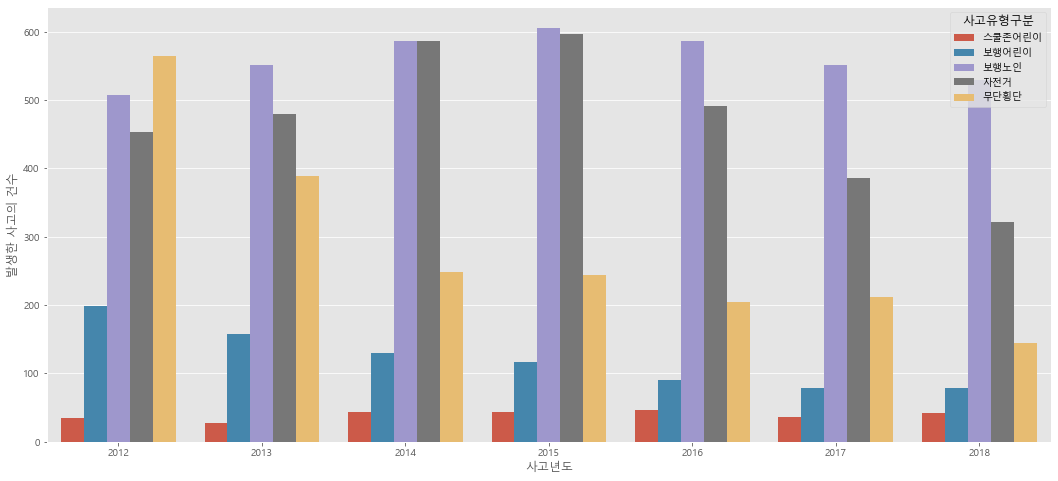

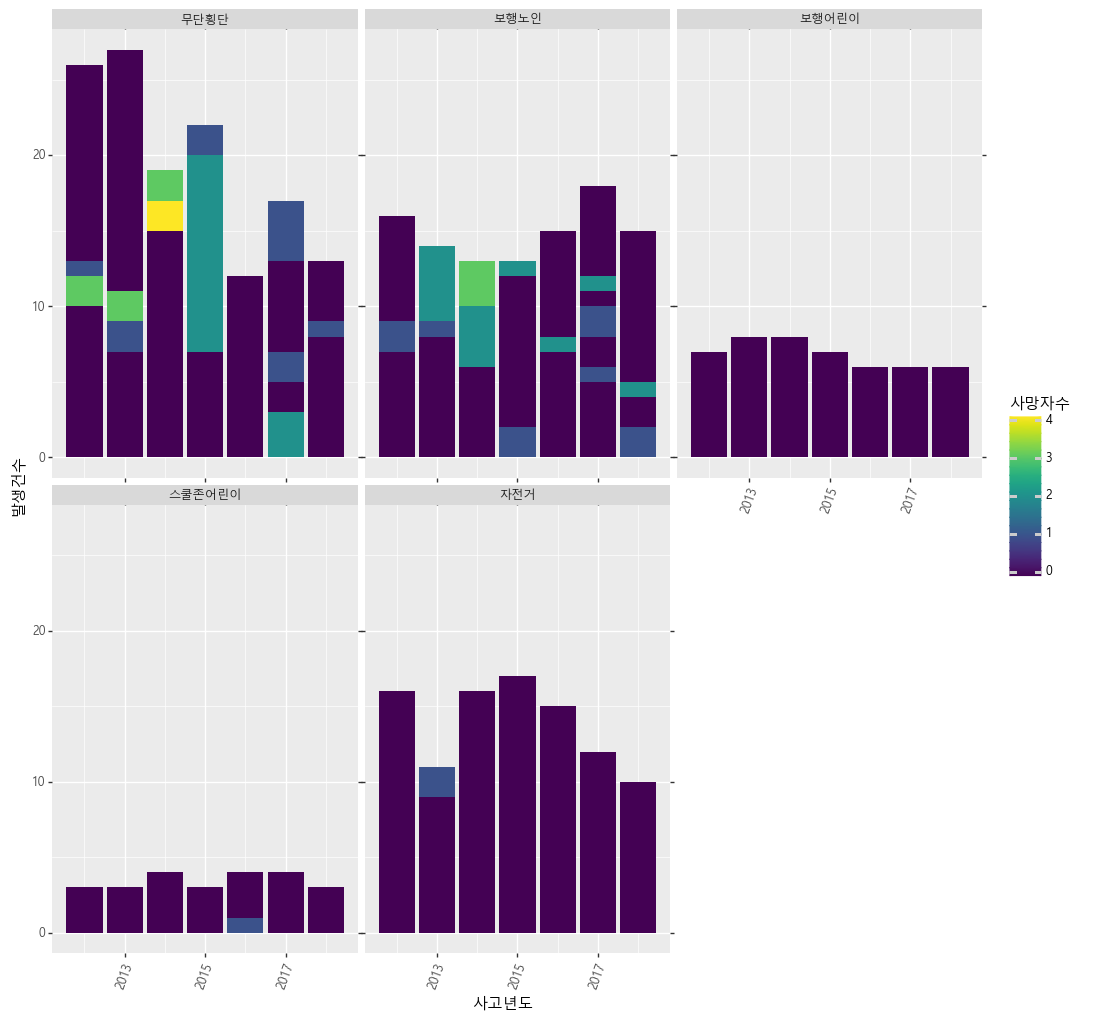

<ggplot: (-9223371966236551784)>

In [20]:
fig,ax= plt.subplots()
fig.set_size_inches(18,8)

sns.countplot(data=sad,x='사고년도',hue='사고유형구분',ax=ax)
plt.ylabel("발생한 사고의 건수")
print("전체적인 사고의 양은 12년도부터 18년도까지 감소하고 있음을 알 수 있다.")
print("가장 많이 감소한 것은 무단횡단 관련사고로 12년도부터 18년도까지 꾸준히 감소했다")
print("두번째로 많이 감소한 것은 자전거 관련사고로 15년도까지는 증가하는 추세를 보이다가 계속 감소했다.")
print("보행노인에 대한 교통사고 건수는 좀처럼 줄어들고 있지 않다. 그러므로 우리 사회는 나이드신 분들이 사고를 겪지 않도록 대책을 마련할 필요가 있어보인다.")
(ggplot(sad)
 + aes(x='사고년도', y='발생건수',fill='사망자수')
 + geom_bar(stat='identity', position='dodge')
 + facet_wrap('사고유형구분')
 + theme(text=element_text(family=font_n),
         axis_text_x=element_text(rotation=70),
         figure_size=(12, 12))
)

In [69]:
sad.columns

Index(['사고지역관리번호', '사고년도', '사고유형구분', '위치코드', '시도시군구명', '사고지역위치명', '발생건수',
       '사상자수', '사망자수', '중상자수', '경상자수', '부상자수', '위도', '경도', '사고다발지역폴리곤정보',
       '데이터기준일자'],
      dtype='object')

In [22]:
sad_illegal = sad.loc[sad['사고유형구분'] == '보행노인']

In [29]:
m = folium.Map(location=[sad['위도'].mean(),sad['경도'].mean()],zoom_start=12)

for i in sad_illegal.index[:1000]:
    sub_lat = sad_illegal.loc[i,'위도']
    sub_long = sad_illegal.loc[i,'경도']
    popup_name = sad_illegal.loc[i,'사고유형구분'] + " + " + sad_illegal.loc[i,'사고지역위치명']
    folium.Marker(location=[sub_lat,sub_long],popup=popup_name).add_to(m)
    
m